Lo primero que vamos a hacer es cargar las principales librerías que vamos a usar en nuestro notebook durante la implementación del algoritmo **KMeans.**

In [1]:
!pip3 install matplotlib

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [2]:
!pip3 install seaborn

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [3]:
!pip3 install scikit-learn

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [4]:

import warnings
warnings.filterwarnings("ignore")

import os

import timel

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [6]:
print("Working with this sklearn version {}".format(sklearn.__version__))

Working with this sklearn version 1.3.0


<a id = "import_data"></a>
# Importación de los datos



In [7]:
DATA_FOLDER = '/Users/marianapirez/Desktop/CAPS2/TASK 1/'

In [8]:
PATH_DF = os.path.join(DATA_FOLDER, 'merge_final_last.csv')

df = pd.read_csv(PATH_DF)

<a id = "df1"></a>
# EDA DF


EDA rápido sobre el **dataset.**

In [11]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    print()
    print(f"Tenemos un total de {total_nulos} nulos")

In [12]:
report_df(df)

df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category_x  object 
 2   store       object 
 3   store_code  object 
 4   region      object 
 5   quantity    int64  
 6   date        object 
 7   yearweek    int64  
 8   sell_price  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 3.9+ GB
None

Tenemos un total de 0 nulos


,item,category_x,store,store_code,region,quantity,date,yearweek,sell_price
58327365,SUPERMARKET_3_823,SUPERMARKET,Queen_Village,PHI_3,Philadelphia,1,2016-04-24,201616,3.576
58327366,SUPERMARKET_3_824,SUPERMARKET,Queen_Village,PHI_3,Philadelphia,0,2016-04-24,201616,2.976
58327367,SUPERMARKET_3_825,SUPERMARKET,Queen_Village,PHI_3,Philadelphia,0,2016-04-24,201616,4.776
58327368,SUPERMARKET_3_826,SUPERMARKET,Queen_Village,PHI_3,Philadelphia,3,2016-04-24,201616,1.536
58327369,SUPERMARKET_3_827,SUPERMARKET,Queen_Village,PHI_3,Philadelphia,0,2016-04-24,201616,1.200


In [13]:
df.isnull().sum()

item          0
category_x    0
store         0
store_code    0
region        0
quantity      0
date          0
yearweek      0
sell_price    0
dtype: int64

<a id = "fe"></a>
# Creación de variables
[Volver al índice](#table_of_contents)

En esta sección del notebook, **iremos agregando el dataset y vamos a generar nuevas variables** para que después en la siguiente sección lo juntamos en uno y hacemos la segmentación.

In [14]:
df["Income"] = df["quantity"] * df["sell_price"]

In [15]:
df_final = df.groupby('item')['Income'].sum().reset_index()

In [16]:
df_final

,item,Income
0,ACCESORIES_1_001,44614.1850
1,ACCESORIES_1_002,26642.0945
2,ACCESORIES_1_003,5553.4815
3,ACCESORIES_1_004,234314.1465
4,ACCESORIES_1_005,55306.7998
...,...,...
3044,SUPERMARKET_3_823,50587.8600
3045,SUPERMARKET_3_824,25381.6560
3046,SUPERMARKET_3_825,65504.7240
3047,SUPERMARKET_3_826,18638.3520


In [17]:
df_quant = df.groupby('item')['quantity'].sum().reset_index()

In [18]:
df_quant

,item,quantity
0,ACCESORIES_1_001,4093
1,ACCESORIES_1_002,5059
2,ACCESORIES_1_003,1435
3,ACCESORIES_1_004,39175
4,ACCESORIES_1_005,14621
...,...,...
3044,SUPERMARKET_3_823,15388
3045,SUPERMARKET_3_824,8325
3046,SUPERMARKET_3_825,13526
3047,SUPERMARKET_3_826,12188


***VARIABLES NUEVAS RELACIONADAS AL PRECIO***

In [19]:
prices_agg = df.groupby('item').agg(
    max_price = ('sell_price', 'max'), 
    mean_price = ('sell_price', 'mean'),
    num_items_sold = ('quantity', 'sum'),
    var_price = ("sell_price", "var")
).reset_index()

In [20]:
prices_agg

,item,max_price,mean_price,num_items_sold,var_price
0,ACCESORIES_1_001,12.7414,5.805245,4093,30.374607
1,ACCESORIES_1_002,5.2801,5.056756,5059,1.119882
2,ACCESORIES_1_003,7.9401,1.591810,1435,3.760778
3,ACCESORIES_1_004,6.1712,5.907499,39175,0.524399
4,ACCESORIES_1_005,4.0964,3.590725,14621,0.918995
...,...,...,...,...,...
3044,SUPERMARKET_3_823,3.5760,3.183148,15388,0.571397
3045,SUPERMARKET_3_824,3.2160,3.012504,8325,0.108223
3046,SUPERMARKET_3_825,5.2560,4.904893,13526,0.198492
3047,SUPERMARKET_3_826,1.5360,0.877236,12188,0.577774


***NUEVAS VARIABLES REFERIDAS A VENTAS POR CIUDAD***

In [21]:
city_agg = df.groupby(['item','region'])['quantity'].sum().reset_index()

In [22]:
city_agg

,item,region,quantity
0,ACCESORIES_1_001,Boston,1047
1,ACCESORIES_1_001,New York,2535
2,ACCESORIES_1_001,Philadelphia,511
3,ACCESORIES_1_002,Boston,878
4,ACCESORIES_1_002,New York,1596
...,...,...,...
9142,SUPERMARKET_3_826,New York,5868
9143,SUPERMARKET_3_826,Philadelphia,3299
9144,SUPERMARKET_3_827,Boston,1254
9145,SUPERMARKET_3_827,New York,5195


HACEMOS PIVOT PARA QUE QUEDE UNA REGION POR COLUMNA

In [23]:
pivoted_city_agg = city_agg.pivot_table(index='item', columns='region', values='quantity', fill_value=0)

In [24]:
pivoted_city_agg

region,Boston,New York,Philadelphia
item,,,
ACCESORIES_1_001,1047,2535,511
ACCESORIES_1_002,878,1596,2585
ACCESORIES_1_003,378,731,326
ACCESORIES_1_004,9695,22821,6659
ACCESORIES_1_005,4142,7481,2998
...,...,...,...
SUPERMARKET_3_823,2300,10240,2848
SUPERMARKET_3_824,1762,4457,2106
SUPERMARKET_3_825,3737,6196,3593


***NUEVAS VARIABLES REFERIDAS A VENTAS POR YEAR***

In [25]:
df['year'] = pd.to_datetime(df['date']).dt.year
ventas_por_año = df.groupby(['item', 'year'])['quantity'].sum().reset_index()

In [26]:
ventas_por_año

,item,year,quantity
0,ACCESORIES_1_001,2011,0
1,ACCESORIES_1_001,2012,0
2,ACCESORIES_1_001,2013,589
3,ACCESORIES_1_001,2014,1283
4,ACCESORIES_1_001,2015,1601
...,...,...,...
18289,SUPERMARKET_3_827,2012,0
18290,SUPERMARKET_3_827,2013,0
18291,SUPERMARKET_3_827,2014,2728
18292,SUPERMARKET_3_827,2015,5440


In [27]:
pivoted_ventas_por_año = ventas_por_año.pivot_table(index='item', columns='year', values='quantity', fill_value=0)

In [28]:
pivoted_ventas_por_año

year,2011,2012,2013,2014,2015,2016
item,,,,,,
ACCESORIES_1_001,0,0,589,1283,1601,620
ACCESORIES_1_002,746,1055,1038,956,986,278
ACCESORIES_1_003,0,0,0,357,795,283
ACCESORIES_1_004,5964,6934,8387,8722,7188,1980
ACCESORIES_1_005,2786,2705,2561,2259,3117,1193
...,...,...,...,...,...,...
SUPERMARKET_3_823,3901,1748,1536,2379,4693,1131
SUPERMARKET_3_824,2308,2296,1584,1469,522,146
SUPERMARKET_3_825,3006,1380,2057,3035,2911,1137



***NUEVAS VARIABLES REFERIDAS A LAS VENTAS POR FIN DE SEMANA Y DIAS LABORALES***


In [29]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = (df['day_of_week'] == 'Saturday') | (df['day_of_week'] == 'Sunday')
ventas_dias_laborables = df[~df['is_weekend']].groupby(['item'])['quantity'].sum().reset_index()
ventas_fin_de_semana = df[df['is_weekend']].groupby(['item'])['quantity'].sum().reset_index()

In [30]:
df = df.drop(['day_of_week', 'is_weekend'], axis=1)

In [31]:
ventas_dias_laborables

,item,quantity
0,ACCESORIES_1_001,2731
1,ACCESORIES_1_002,3282
2,ACCESORIES_1_003,891
3,ACCESORIES_1_004,25077
4,ACCESORIES_1_005,9371
...,...,...
3044,SUPERMARKET_3_823,10025
3045,SUPERMARKET_3_824,5557
3046,SUPERMARKET_3_825,8819
3047,SUPERMARKET_3_826,8443


In [32]:
ventas_fin_de_semana

,item,quantity
0,ACCESORIES_1_001,1362
1,ACCESORIES_1_002,1777
2,ACCESORIES_1_003,544
3,ACCESORIES_1_004,14098
4,ACCESORIES_1_005,5250
...,...,...
3044,SUPERMARKET_3_823,5363
3045,SUPERMARKET_3_824,2768
3046,SUPERMARKET_3_825,4707
3047,SUPERMARKET_3_826,3745


**EN LA SIGUIENTE SECCION, PASAMOS A HACER LOS MERGES PARA OBTENER UN SOLO DATASET CON TODAS LAS NUEVAS VARIABLES**

**Merge quantity**

In [33]:
df_final = df_final.merge(df_quant, on="item", how = "left")

In [34]:
df_final

,item,Income,quantity
0,ACCESORIES_1_001,44614.1850,4093
1,ACCESORIES_1_002,26642.0945,5059
2,ACCESORIES_1_003,5553.4815,1435
3,ACCESORIES_1_004,234314.1465,39175
4,ACCESORIES_1_005,55306.7998,14621
...,...,...,...
3044,SUPERMARKET_3_823,50587.8600,15388
3045,SUPERMARKET_3_824,25381.6560,8325
3046,SUPERMARKET_3_825,65504.7240,13526
3047,SUPERMARKET_3_826,18638.3520,12188


**Merge variables prices**

In [35]:
df_final = df_final.merge(prices_agg, on = "item", how = "left")

In [36]:
df_final

,item,Income,quantity,max_price,mean_price,num_items_sold,var_price
0,ACCESORIES_1_001,44614.1850,4093,12.7414,5.805245,4093,30.374607
1,ACCESORIES_1_002,26642.0945,5059,5.2801,5.056756,5059,1.119882
2,ACCESORIES_1_003,5553.4815,1435,7.9401,1.591810,1435,3.760778
3,ACCESORIES_1_004,234314.1465,39175,6.1712,5.907499,39175,0.524399
4,ACCESORIES_1_005,55306.7998,14621,4.0964,3.590725,14621,0.918995
...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,50587.8600,15388,3.5760,3.183148,15388,0.571397
3045,SUPERMARKET_3_824,25381.6560,8325,3.2160,3.012504,8325,0.108223
3046,SUPERMARKET_3_825,65504.7240,13526,5.2560,4.904893,13526,0.198492
3047,SUPERMARKET_3_826,18638.3520,12188,1.5360,0.877236,12188,0.577774


In [37]:
df_final.drop(columns=['num_items_sold'], inplace=True)

**Merge ventas por ciudad**

In [38]:
df_final = df_final.merge(pivoted_city_agg, on = ["item"], how = "left")

In [39]:
df_final

,item,Income,quantity,max_price,mean_price,var_price,Boston,New York,Philadelphia
0,ACCESORIES_1_001,44614.1850,4093,12.7414,5.805245,30.374607,1047,2535,511
1,ACCESORIES_1_002,26642.0945,5059,5.2801,5.056756,1.119882,878,1596,2585
2,ACCESORIES_1_003,5553.4815,1435,7.9401,1.591810,3.760778,378,731,326
3,ACCESORIES_1_004,234314.1465,39175,6.1712,5.907499,0.524399,9695,22821,6659
4,ACCESORIES_1_005,55306.7998,14621,4.0964,3.590725,0.918995,4142,7481,2998
...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,50587.8600,15388,3.5760,3.183148,0.571397,2300,10240,2848
3045,SUPERMARKET_3_824,25381.6560,8325,3.2160,3.012504,0.108223,1762,4457,2106
3046,SUPERMARKET_3_825,65504.7240,13526,5.2560,4.904893,0.198492,3737,6196,3593
3047,SUPERMARKET_3_826,18638.3520,12188,1.5360,0.877236,0.577774,3021,5868,3299


In [40]:
df_final = df_final.rename(columns={
    "Boston": "ventas Boston",
    "New York": "ventas New York",
    "Philadelphia": "ventas Philadelphia"
})

**Merge ventas por año**

In [41]:
df_final = df_final.merge(pivoted_ventas_por_año, on=['item'], how='left')

In [42]:
df_final

,item,Income,quantity,max_price,mean_price,var_price,ventas Boston,ventas New York,ventas Philadelphia,2011,2012,2013,2014,2015,2016
0,ACCESORIES_1_001,44614.1850,4093,12.7414,5.805245,30.374607,1047,2535,511,0,0,589,1283,1601,620
1,ACCESORIES_1_002,26642.0945,5059,5.2801,5.056756,1.119882,878,1596,2585,746,1055,1038,956,986,278
2,ACCESORIES_1_003,5553.4815,1435,7.9401,1.591810,3.760778,378,731,326,0,0,0,357,795,283
3,ACCESORIES_1_004,234314.1465,39175,6.1712,5.907499,0.524399,9695,22821,6659,5964,6934,8387,8722,7188,1980
4,ACCESORIES_1_005,55306.7998,14621,4.0964,3.590725,0.918995,4142,7481,2998,2786,2705,2561,2259,3117,1193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,50587.8600,15388,3.5760,3.183148,0.571397,2300,10240,2848,3901,1748,1536,2379,4693,1131
3045,SUPERMARKET_3_824,25381.6560,8325,3.2160,3.012504,0.108223,1762,4457,2106,2308,2296,1584,1469,522,146
3046,SUPERMARKET_3_825,65504.7240,13526,5.2560,4.904893,0.198492,3737,6196,3593,3006,1380,2057,3035,2911,1137
3047,SUPERMARKET_3_826,18638.3520,12188,1.5360,0.877236,0.577774,3021,5868,3299,0,0,3088,3957,3682,1461


In [43]:
df_final = df_final.rename(columns={
    2011: "ventas_2011".strip(),
    2012: "ventas_2012".strip(),
    2013: "ventas_2013".strip(),
    2014: "ventas_2014".strip(),
    2015: "ventas_2015".strip(),
    2016: "ventas_2016".strip()
})


**Merge dias laborables**

In [44]:
df_final = df_final.merge(ventas_dias_laborables, on=['item'], how='left')

**Merge findes**

In [45]:
df_final = df_final.merge(ventas_fin_de_semana, on=['item'], how='left')

In [46]:
df_final

,item,Income,quantity_x,max_price,mean_price,var_price,ventas Boston,ventas New York,ventas Philadelphia,ventas_2011,ventas_2012,ventas_2013,ventas_2014,ventas_2015,ventas_2016,quantity_y,quantity
0,ACCESORIES_1_001,44614.1850,4093,12.7414,5.805245,30.374607,1047,2535,511,0,0,589,1283,1601,620,2731,1362
1,ACCESORIES_1_002,26642.0945,5059,5.2801,5.056756,1.119882,878,1596,2585,746,1055,1038,956,986,278,3282,1777
2,ACCESORIES_1_003,5553.4815,1435,7.9401,1.591810,3.760778,378,731,326,0,0,0,357,795,283,891,544
3,ACCESORIES_1_004,234314.1465,39175,6.1712,5.907499,0.524399,9695,22821,6659,5964,6934,8387,8722,7188,1980,25077,14098
4,ACCESORIES_1_005,55306.7998,14621,4.0964,3.590725,0.918995,4142,7481,2998,2786,2705,2561,2259,3117,1193,9371,5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,50587.8600,15388,3.5760,3.183148,0.571397,2300,10240,2848,3901,1748,1536,2379,4693,1131,10025,5363
3045,SUPERMARKET_3_824,25381.6560,8325,3.2160,3.012504,0.108223,1762,4457,2106,2308,2296,1584,1469,522,146,5557,2768
3046,SUPERMARKET_3_825,65504.7240,13526,5.2560,4.904893,0.198492,3737,6196,3593,3006,1380,2057,3035,2911,1137,8819,4707
3047,SUPERMARKET_3_826,18638.3520,12188,1.5360,0.877236,0.577774,3021,5868,3299,0,0,3088,3957,3682,1461,8443,3745


In [47]:
df_final = df_final.rename(columns={
    "quantity_y": "ventas_dias_laborales",
    "quantity": "ventas_fin_de_sem"
})

In [48]:
df_final

,item,Income,quantity_x,max_price,mean_price,var_price,ventas Boston,ventas New York,ventas Philadelphia,ventas_2011,ventas_2012,ventas_2013,ventas_2014,ventas_2015,ventas_2016,ventas_dias_laborales,ventas_fin_de_sem
0,ACCESORIES_1_001,44614.1850,4093,12.7414,5.805245,30.374607,1047,2535,511,0,0,589,1283,1601,620,2731,1362
1,ACCESORIES_1_002,26642.0945,5059,5.2801,5.056756,1.119882,878,1596,2585,746,1055,1038,956,986,278,3282,1777
2,ACCESORIES_1_003,5553.4815,1435,7.9401,1.591810,3.760778,378,731,326,0,0,0,357,795,283,891,544
3,ACCESORIES_1_004,234314.1465,39175,6.1712,5.907499,0.524399,9695,22821,6659,5964,6934,8387,8722,7188,1980,25077,14098
4,ACCESORIES_1_005,55306.7998,14621,4.0964,3.590725,0.918995,4142,7481,2998,2786,2705,2561,2259,3117,1193,9371,5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,50587.8600,15388,3.5760,3.183148,0.571397,2300,10240,2848,3901,1748,1536,2379,4693,1131,10025,5363
3045,SUPERMARKET_3_824,25381.6560,8325,3.2160,3.012504,0.108223,1762,4457,2106,2308,2296,1584,1469,522,146,5557,2768
3046,SUPERMARKET_3_825,65504.7240,13526,5.2560,4.904893,0.198492,3737,6196,3593,3006,1380,2057,3035,2911,1137,8819,4707
3047,SUPERMARKET_3_826,18638.3520,12188,1.5360,0.877236,0.577774,3021,5868,3299,0,0,3088,3957,3682,1461,8443,3745


In [49]:
df_final = df_final.rename(columns={
    "quantity_x": "quantity"
})

***DF FINAL CON NUEVAS VARIABLES***

In [50]:
df_final

,item,Income,quantity,max_price,mean_price,var_price,ventas Boston,ventas New York,ventas Philadelphia,ventas_2011,ventas_2012,ventas_2013,ventas_2014,ventas_2015,ventas_2016,ventas_dias_laborales,ventas_fin_de_sem
0,ACCESORIES_1_001,44614.1850,4093,12.7414,5.805245,30.374607,1047,2535,511,0,0,589,1283,1601,620,2731,1362
1,ACCESORIES_1_002,26642.0945,5059,5.2801,5.056756,1.119882,878,1596,2585,746,1055,1038,956,986,278,3282,1777
2,ACCESORIES_1_003,5553.4815,1435,7.9401,1.591810,3.760778,378,731,326,0,0,0,357,795,283,891,544
3,ACCESORIES_1_004,234314.1465,39175,6.1712,5.907499,0.524399,9695,22821,6659,5964,6934,8387,8722,7188,1980,25077,14098
4,ACCESORIES_1_005,55306.7998,14621,4.0964,3.590725,0.918995,4142,7481,2998,2786,2705,2561,2259,3117,1193,9371,5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,50587.8600,15388,3.5760,3.183148,0.571397,2300,10240,2848,3901,1748,1536,2379,4693,1131,10025,5363
3045,SUPERMARKET_3_824,25381.6560,8325,3.2160,3.012504,0.108223,1762,4457,2106,2308,2296,1584,1469,522,146,5557,2768
3046,SUPERMARKET_3_825,65504.7240,13526,5.2560,4.904893,0.198492,3737,6196,3593,3006,1380,2057,3035,2911,1137,8819,4707
3047,SUPERMARKET_3_826,18638.3520,12188,1.5360,0.877236,0.577774,3021,5868,3299,0,0,3088,3957,3682,1461,8443,3745


In [51]:
df_final = df_final.set_index('item')

In [52]:
df_final.T

item,ACCESORIES_1_001,ACCESORIES_1_002,ACCESORIES_1_003,ACCESORIES_1_004,ACCESORIES_1_005,ACCESORIES_1_006,ACCESORIES_1_007,ACCESORIES_1_008,ACCESORIES_1_009,ACCESORIES_1_010,...,SUPERMARKET_3_818,SUPERMARKET_3_819,SUPERMARKET_3_820,SUPERMARKET_3_821,SUPERMARKET_3_822,SUPERMARKET_3_823,SUPERMARKET_3_824,SUPERMARKET_3_825,SUPERMARKET_3_826,SUPERMARKET_3_827
Income,44614.185000,26642.094500,5553.481500,234314.146500,55306.799800,17296.171200,31379.541200,55051.227000,35707.427700,46081.17500,...,126973.032000,89946.672000,71828.928000,40198.884000,257717.424000,50587.860000,25381.656000,65504.724000,18638.352000,13483.200000
quantity,4093.000000,5059.000000,1435.000000,39175.000000,14621.000000,13068.000000,3014.000000,87645.000000,15657.000000,11689.00000,...,35759.000000,38288.000000,30528.000000,6770.000000,58133.000000,15388.000000,8325.000000,13526.000000,12188.000000,11377.000000
max_price,12.741400,5.280100,7.940100,6.171200,4.096400,1.489600,10.560200,0.665000,2.354100,4.21610,...,3.576000,2.616000,2.376000,5.976000,5.376000,3.576000,3.216000,5.256000,1.536000,1.200000
mean_price,5.805245,5.056756,1.591810,5.907499,3.590725,1.035303,7.317300,0.615560,2.194464,3.93794,...,2.569935,2.357743,2.159222,3.314461,4.631983,3.183148,3.012504,4.904893,0.877236,0.422196
var_price,30.374607,1.119882,3.760778,0.524399,0.918995,0.312016,23.166329,0.011188,0.220828,0.07575,...,2.585658,0.067072,0.447444,8.819399,0.399734,0.571397,0.108223,0.198492,0.577774,0.328271
ventas Boston,1047.000000,878.000000,378.000000,9695.000000,4142.000000,2109.000000,668.000000,20619.000000,3944.000000,3912.00000,...,9383.000000,7588.000000,7787.000000,1613.000000,13600.000000,2300.000000,1762.000000,3737.000000,3021.000000,1254.000000
ventas New York,2535.000000,1596.000000,731.000000,22821.000000,7481.000000,5674.000000,1312.000000,47556.000000,8250.000000,4302.00000,...,17491.000000,17113.000000,10847.000000,2356.000000,26332.000000,10240.000000,4457.000000,6196.000000,5868.000000,5195.000000
ventas Philadelphia,511.000000,2585.000000,326.000000,6659.000000,2998.000000,5285.000000,1034.000000,19470.000000,3463.000000,3475.00000,...,8885.000000,13587.000000,11894.000000,2801.000000,18201.000000,2848.000000,2106.000000,3593.000000,3299.000000,4928.000000
ventas_2011,0.000000,746.000000,0.000000,5964.000000,2786.000000,0.000000,0.000000,19160.000000,3034.000000,2313.00000,...,0.000000,12779.000000,3954.000000,0.000000,5023.000000,3901.000000,2308.000000,3006.000000,0.000000,0.000000
ventas_2012,0.000000,1055.000000,0.000000,6934.000000,2705.000000,3312.000000,240.000000,10359.000000,3512.000000,2590.00000,...,4120.000000,7664.000000,4669.000000,0.000000,13906.000000,1748.000000,2296.000000,1380.000000,0.000000,0.000000


In [78]:
# items_a_eliminar = ["SUPERMARKET_3_090", "SUPERMARKET_3_252", "SUPERMARKET_3_555", "SUPERMARKET_3_586"]
# df_final = df_final.drop(items_a_eliminar, axis=0)

In [ ]:
#report_df(df_final)

**CREAMOS PRIMER PIPLENE**

In [83]:
pipe = Pipeline(
    steps = [
        ('impute_nulls', KNNImputer()),
        ('scaler', RobustScaler())
    ]
)

In [84]:
df_final_scaled = pipe.fit_transform(df_final)

In [85]:
df_final_scaled.head()

,Income,quantity,max_price,mean_price,var_price,ventas Boston,ventas New York,ventas Philadelphia,ventas_2011,ventas_2012,ventas_2013,ventas_2014,ventas_2015,ventas_2016,ventas_dias_laborales,ventas_fin_de_sem,cluster
item,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,0.025851,-0.318531,1.802425,0.664133,7.443809,-0.298785,-0.234511,-0.401213,-0.243414,-0.359030,-0.329501,-0.193824,-0.173222,-0.118110,-0.309602,-0.329927,0.0
ACCESORIES_1_002,-0.265918,-0.261864,0.187075,0.471164,-0.039287,-0.337537,-0.358292,0.032406,0.018616,-0.071643,-0.203589,-0.290000,-0.344770,-0.387402,-0.260568,-0.259240,0.0
ACCESORIES_1_003,-0.608282,-0.474453,0.762957,-0.422141,0.636231,-0.452190,-0.472317,-0.439891,-0.243414,-0.359030,-0.494672,-0.466176,-0.398047,-0.383465,-0.473347,-0.469256,0.0
ACCESORIES_1_004,3.105545,1.739426,0.379996,0.690496,-0.191606,1.684247,2.439626,0.884173,1.851423,1.529828,1.857263,1.994118,1.385216,0.952756,1.679007,1.839380,2.0
ACCESORIES_1_005,0.199441,0.299056,-0.069192,0.093203,-0.090672,0.410915,0.417480,0.118754,0.735160,0.377826,0.223500,0.093235,0.249651,0.333071,0.281303,0.332311,0.0


In [86]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_final_scaled)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


<a id = "elbow_curve"></a>
# Elbow curve (CORE IDEA)


En esta sección vamos a visualizar nuestro ***Elbow Curve*** y buscaremos el punto de inflexión que será nuestro número de centroides.

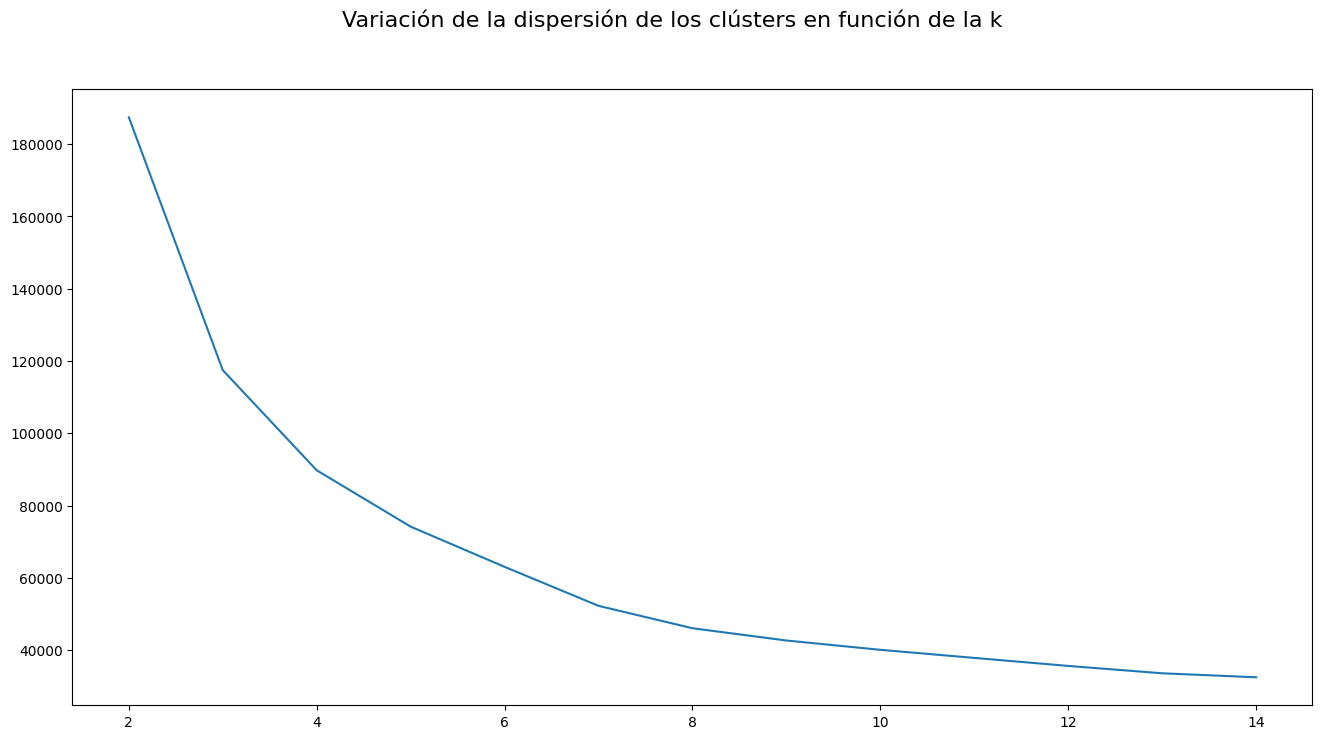

In [87]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

<a id = "segmentacion"></a>
# Segmentación de los clientes con la "k adecuada" (CORE IDEA)


Ahora que hemos determinado el número de centroides correcto podemos fittear nuestro pipeline con la ***k adecuada.***

Dado que vamos a realizar nuestra segmentación con KMeans y vamos a suministrarle las variables de nuestro interés a veces a KMeans se le conoce como **segmentación no supervisada pero guiada**. Guiada porque de alguna manera el data scientist le dice (lo guía) a que discrimine usando unas variables y no otras.

**A NUESTRO PIPELINE LE SUMAMOS KMEANS**

In [100]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 4, random_state = 175))
])

In [101]:
df_final.shape

(3045, 17)

In [102]:
pipe.fit(df_final)

Pipeline(steps=[('Imputer', KNNImputer()),
                ('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=4, random_state=175))])

In [103]:
X_processed = pipe[:1].transform(df_final)

In [104]:
labels = pipe.predict(df_final)

In [105]:
df_final["cluster"] = labels

In [106]:
df_final.shape

(3045, 17)

In [107]:
ficha = df_final.groupby(["cluster"]).describe().T

In [108]:
!pip3 install Jinja2

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [109]:
df_final["cluster"].value_counts()

cluster
0    2315
1     340
2     329
3      61
Name: count, dtype: int64

**ANALIZAMOS A TRAVES DE LA FICHA, LOS DISTINTOS CLUSTERS**

In [110]:
ficha.style.background_gradient(cmap = 'Blues', axis = 1)